# Decision Tree Classifier with Pruning: Unveiling Insights in the Iris Dataset

## Introduction

Welcome to this Jupyter Notebook, where we explore the fascinating world of decision tree classification, with a special focus on pruning techniques. In this project, our aim is to delve into the intricacies of decision trees and demonstrate the impact of pruning on model performance using the well-known Iris dataset.

### The Iris Dataset

The Iris dataset is a classic benchmark in the realm of machine learning. It consists of measurements for three species of iris flowers: setosa, versicolor, and virginica. Each iris sample is characterized by four features: sepal length, sepal width, petal length, and petal width. Our objective is to employ decision tree classification to accurately predict the species based on these features.

### Decision Tree Classification and Pruning

#### Decision Tree Classifier
Decision trees are powerful tools for classification tasks, offering intuitive interpretability and the ability to capture complex decision boundaries. We'll delve into the workings of a decision tree classifier, exploring how it partitions feature space to make predictions based on the input features.

#### Pruning Techniques
While decision trees can capture intricate details of the training data, they run the risk of overfitting, leading to poor generalization on new, unseen data. Pruning is a technique employed to prevent overfitting by selectively removing branches of the tree. We'll investigate pruning strategies to optimize the trade-off between model complexity and performance.

### Project Overview

1. **Data Exploration and Preprocessing:**
   We'll start by loading and exploring the Iris dataset, ensuring it's ready for training our decision tree classifier.

2. **Decision Tree Classification:**
   Implementing a decision tree classifier on the Iris dataset without pruning to establish a baseline understanding of the model's behavior.

3. **Pruning Techniques:**
   Introducing pruning techniques such as cost-complexity pruning to optimize the decision tree model.

4. **Model Evaluation:**
   Assessing the performance of the decision tree classifier with and without pruning using relevant evaluation metrics such as accuracy, precision, recall, and F1 score.

### Learning Objectives

Throughout this notebook, we will:

- Gain a deep understanding of decision tree classification.
- Explore the concept of pruning and its importance in preventing overfitting.
- Implement decision tree classifiers with and without pruning on the Iris dataset.
- Evaluate and compare the performance of the models through meaningful metrics.

So, join us on this journey to unravel the potential of decision tree classifiers and understand the art of pruning for enhanced model generalization.


## Loading Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

## Loading Dataset: Method 1

In [12]:
iris=load_iris()

In [13]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Part 1: Post-Prunning

### Dataset Splitting: Method 1

In [14]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y=pd.DataFrame(iris.target)
Y.head()

,0
0,0
1,0
2,0
3,0
4,0


### Dataset Loading: Method 2

In [19]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Dataset Splitting: Method 2

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)

### Model Development

In [21]:
# Post Pruning as all hyperparameter set as default


model=DecisionTreeClassifier()

In [22]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

### Model Visualization

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[2] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]')

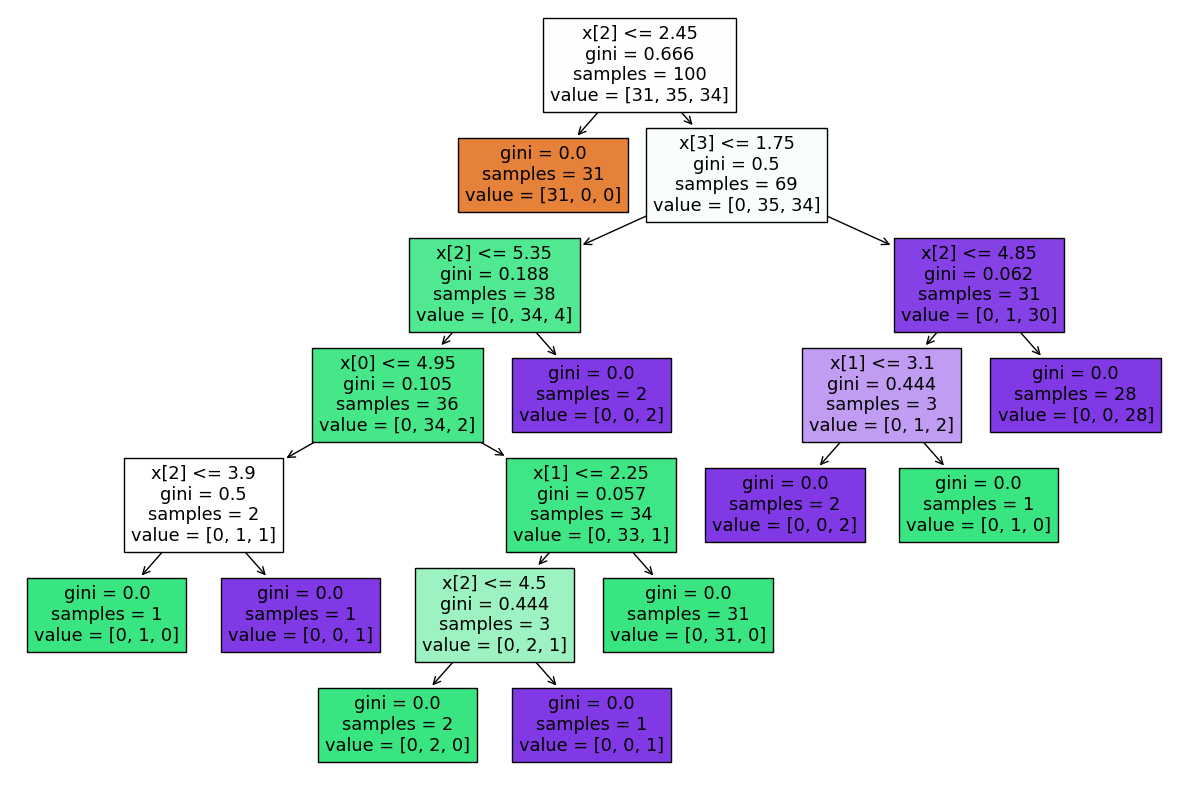

In [25]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled=True)

### Post Prunning

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

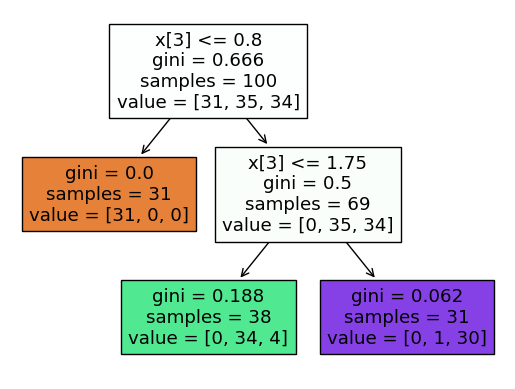

In [26]:
# from decision tree diagram max_depth can be taken 2 which reduce overfitting

newmodel=DecisionTreeClassifier(max_depth=2)
newmodel.fit(X_train, Y_train)
tree.plot_tree(newmodel, filled=True)

### Model Comparison

In [27]:
# model comparison of pre-prunnning and non prunning model
Y_pred=model.predict(X_test)
newY_pred=newmodel.predict(X_test)

### Model Evaluation

In [28]:
score=accuracy_score(Y_pred, Y_test)
newscore=accuracy_score(newY_pred, Y_test)
print(score, newscore)

0.98 0.98


In [29]:
print(classification_report(Y_pred, Y_test), classification_report(newY_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Part 2: Pre- Prunning

### Dataset Splitting

In [5]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
Y=pd.DataFrame(iris.target)
Y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [7]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)

### Hyperparameter - Preprunning

In [11]:
parameter={'criterion':['gini', 'entropy', 'log_loss'], 'splitter':['best', 'random'], 'max_depth':[1, 2, 3, 4, 5], 'max_features':['auto', 'sqrt', 'log2']}

### Model Development

In [12]:
model=DecisionTreeClassifier()
cv=GridSearchCV(model, param_grid=parameter, cv=5, scoring='accuracy')
cv.fit(X_train, Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda

C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda

C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda

C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\HP\anaconda

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

### Model Evaluation

In [13]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [16]:
Y_pred=cv.predict(X_test)

In [18]:
score=accuracy_score(Y_pred, Y_test)
score

0.98

In [19]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

